In [1]:
from sklearn.decomposition import PCA
from ucimlrepo import fetch_ucirepo 
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from scipy.spatial.distance import cdist
import time
import seaborn as sns
from matplotlib.patches import Ellipse
from kneed import KneeLocator
import itertools
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler
from scipy.stats import kurtosis
from sklearn.decomposition import FastICA
from numpy import linalg
from sklearn.random_projection import GaussianRandomProjection
from sklearn import metrics
from itertools import product
from collections import defaultdict
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from scipy import stats

In [2]:
RANDOM_STATE = 101
seeds = [1, 10, 25, 50, 101]

In [3]:
# Wine Quality Data
# fetch dataset 
wq_df = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
wq_X = wq_df.data.features 
wq_y = wq_df.data.targets 

# Breast Cancer Data
# fetch dataset 
bc_df = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
bc_X = bc_df.data.features 
bc_y = bc_df.data.targets 

In [4]:
# Split into training and testing sets. Don't use test set until the very end
bc_X, X_test, bc_y, y_test = train_test_split(bc_X, bc_y, test_size=.2, random_state=RANDOM_STATE, stratify = bc_y)
# Split into training and testing sets. Don't use test set until the very end
wq_X, X_test, wq_y, y_test = train_test_split(wq_X, wq_y, test_size=.2, random_state=RANDOM_STATE, stratify = wq_y)

In [5]:
# Standardized data
scaler = MinMaxScaler()
wq_scaled = scaler.fit_transform(wq_X)
bc_scaled = scaler.fit_transform(bc_X)

## Correlation Matrix

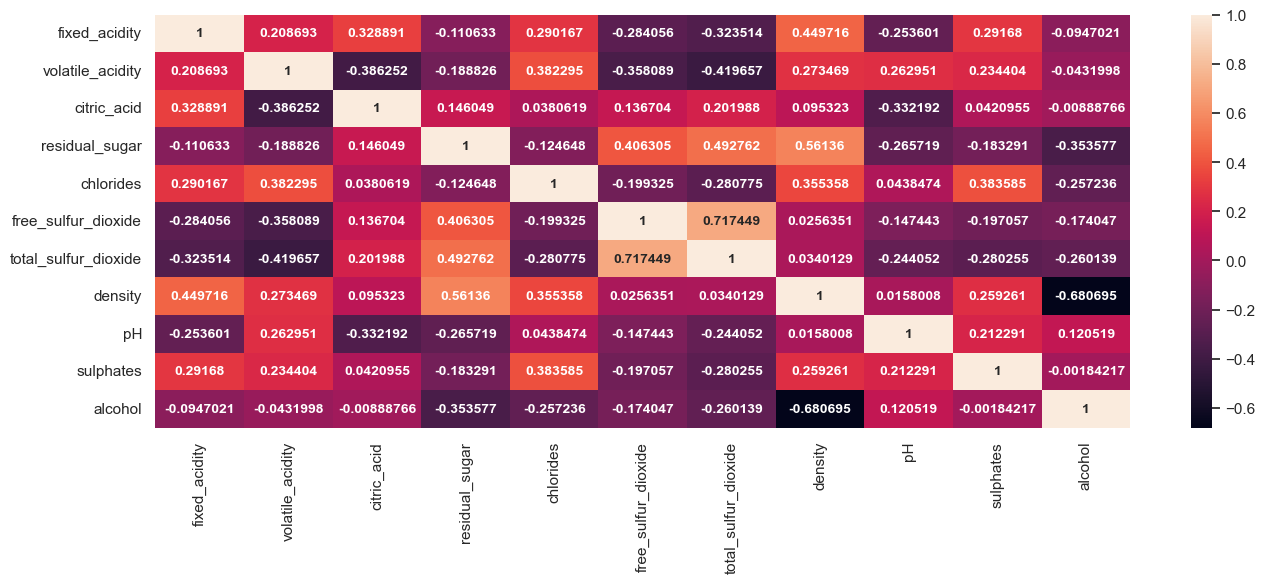

In [6]:
correlation = pd.DataFrame(wq_scaled,columns = wq_X.columns)
correlation=correlation.corr()
sns.set(rc={'figure.figsize':(14,6)})
cm = sns.heatmap(correlation, annot=True, fmt='g', annot_kws={"fontsize":10, 'weight':'bold'})
plt.tight_layout()
plt.show()

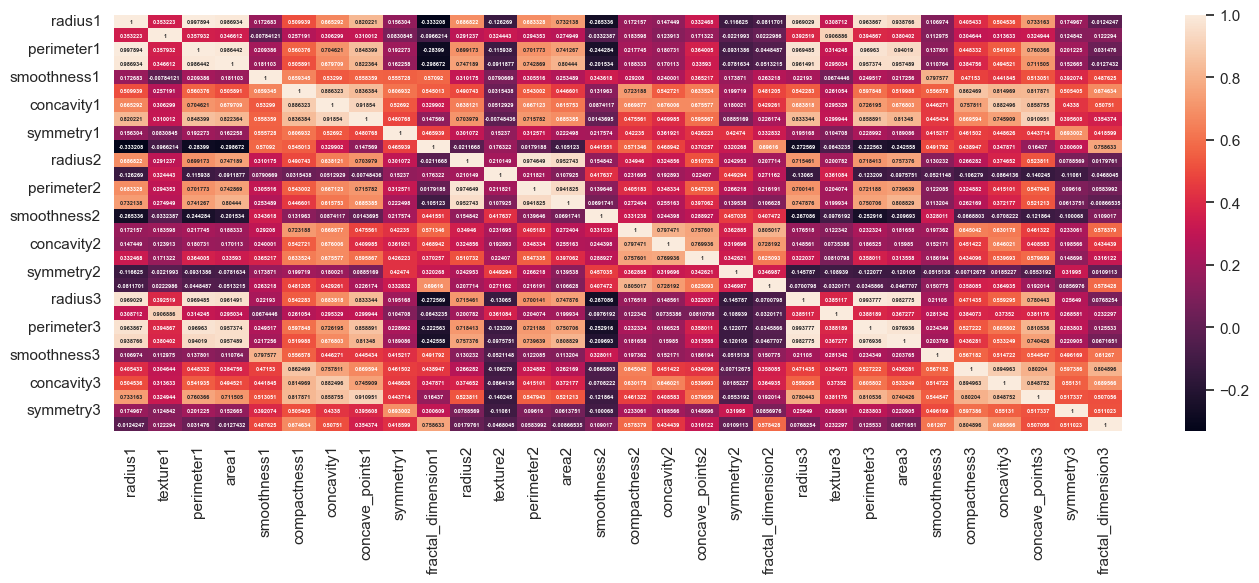

In [7]:
correlation = pd.DataFrame(bc_scaled,columns = bc_X.columns)
correlation=correlation.corr()
sns.set(rc={'figure.figsize':(14,6)})
cm = sns.heatmap(correlation, annot=True, fmt='g', annot_kws={"fontsize":4, 'weight':'bold'})
plt.tight_layout()
plt.show()

In [8]:
# # Calculate the z-score
# wq= pd.DataFrame(wq_scaled,columns = wq_X.columns)
# z = np.abs(stats.zscore(wq['citric_acid']))

# # Identify outliers as students with a z-score greater than 3
# threshold = 3
# outliers = wq[z > threshold]

# # Print the outliers
# print(outliers)

## Wine Quality

### PCA

In [9]:
# Get plotting info
pca_range = np.arange(1, 12)
explained_variances = []
ratios = []

pca = PCA(n_components = 11, random_state=RANDOM_STATE)
pca.fit(wq_scaled)
explained_variances = pca.explained_variance_
ratios = pca.explained_variance_ratio_
cumulative_variances = np.cumsum(ratios)
k = KneeLocator(pca_range, cumulative_variances, curve='concave', direction='increasing')
evr_elbow = k.knee

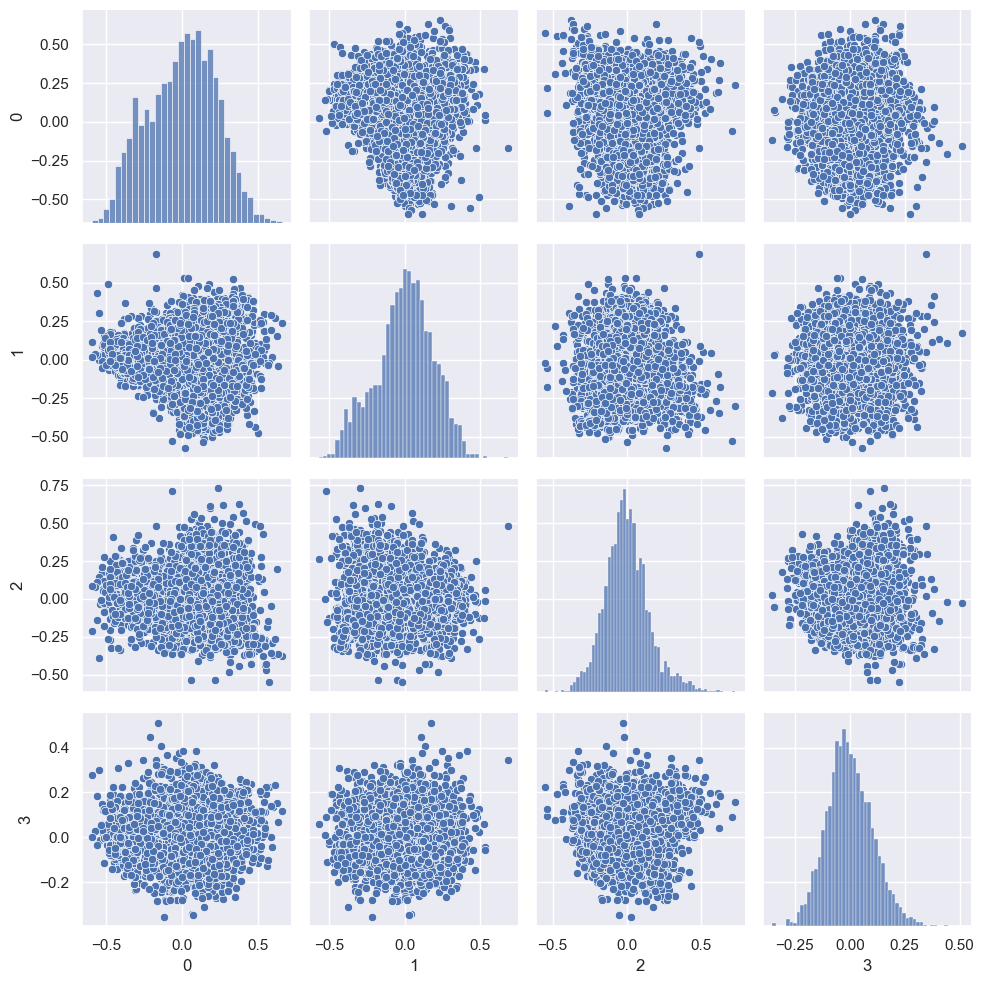

<Figure size 1400x600 with 0 Axes>

In [10]:
# Apply PCA with optimal components to data
pca = PCA(n_components = 4, random_state=RANDOM_STATE)
wq_pca = pca.fit_transform(wq_scaled)
wq_df = pd.DataFrame(wq_pca)
g = sns.pairplot(wq_df)
plt.tight_layout()
plt.show()
plt.savefig(f'plots/dim_red/wq_pca_pairplot.png', dpi=1200)

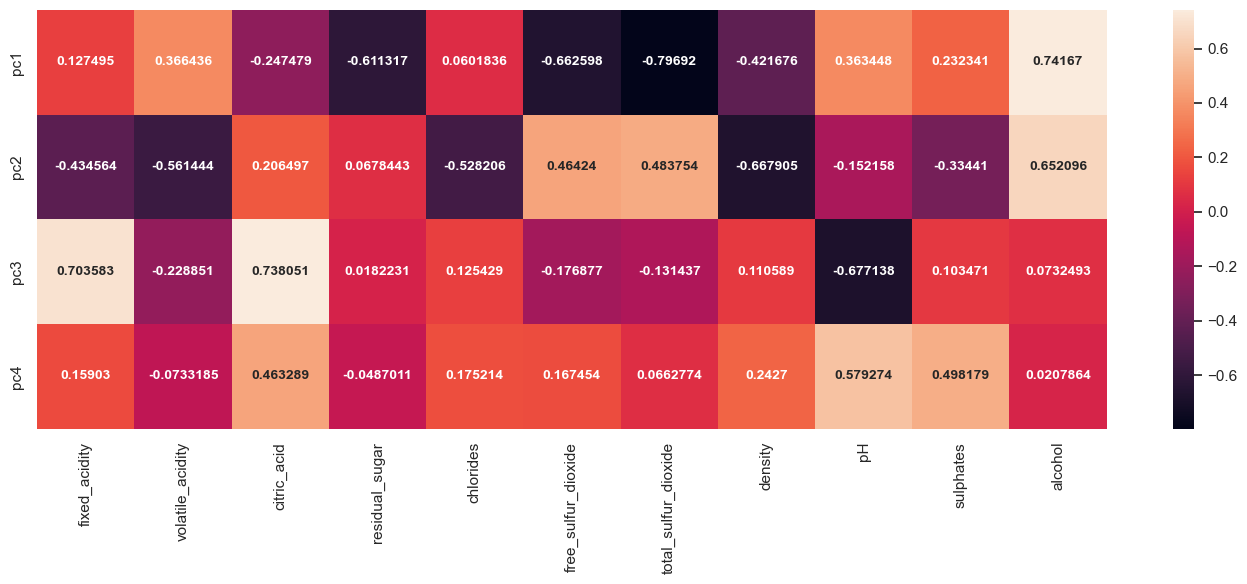

In [11]:
# Apply PCA with optimal components to data
pca = PCA(n_components = 4, random_state=RANDOM_STATE)
wq_pca = pca.fit_transform(wq_scaled)
wq_df = pd.DataFrame(wq_pca, columns=['pc1', 'pc2', 'pc3', 'pc4'])
wq_col = pd.concat([wq_df,pd.DataFrame(wq_scaled, columns=wq_X.columns)], axis=1)
# covMatrix = pd.DataFrame.cov(wq_col)
correlation=wq_col.corr()
correlation = correlation.iloc[:4]
correlation = correlation.drop(['pc1', 'pc2', 'pc3', 'pc4'], axis=1)
sns.set(rc={'figure.figsize':(14,6)})
cm = sns.heatmap(correlation, annot=True, fmt='g', annot_kws={"fontsize":10, 'weight':'bold'})
plt.tight_layout()
plt.show()
fig = cm.get_figure()
fig.savefig(f'plots/dim_red/wq_pca_cm.png', dpi=600)

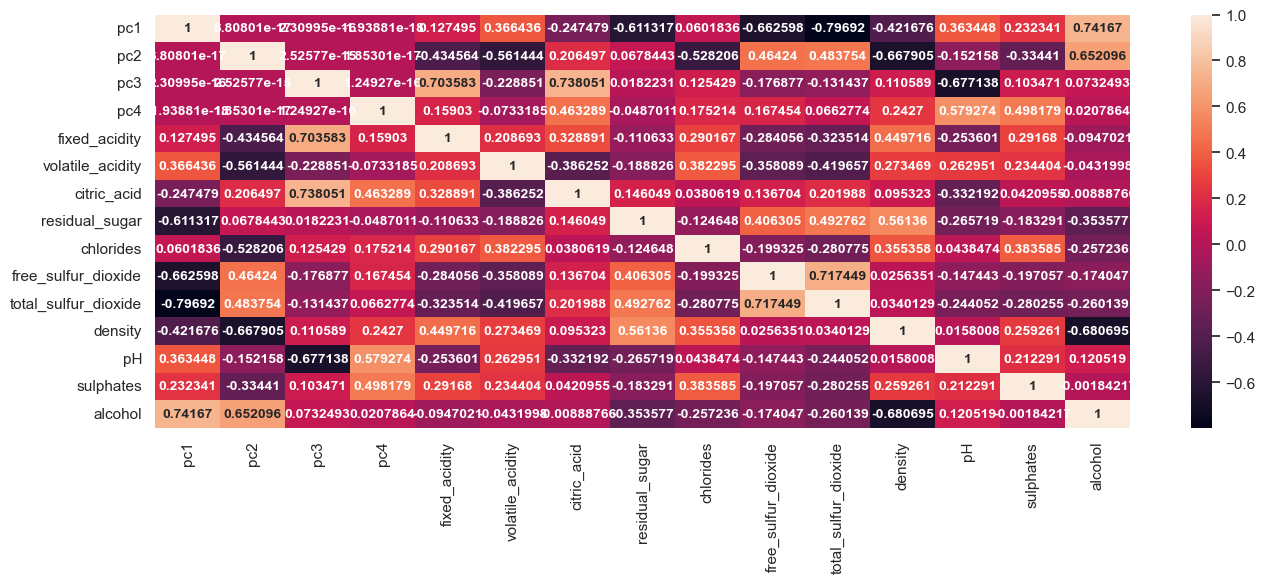

In [12]:
# Apply PCA with optimal components to data
pca = PCA(n_components = 4, random_state=RANDOM_STATE)
wq_pca = pca.fit_transform(wq_scaled)
wq_df = pd.DataFrame(wq_pca, columns=['pc1', 'pc2', 'pc3', 'pc4'])
wq_col = pd.concat([wq_df,pd.DataFrame(wq_scaled, columns=wq_X.columns)], axis=1)
# covMatrix = pd.DataFrame.cov(wq_col)
correlation=wq_col.corr()
# correlation = correlation.iloc[:4]
# correlation = correlation.drop(['pc1', 'pc2', 'pc3', 'pc4'], axis=1)
sns.set(rc={'figure.figsize':(14,6)})
cm = sns.heatmap(correlation, annot=True, fmt='g', annot_kws={"fontsize":10, 'weight':'bold'})
plt.tight_layout()
plt.show()
fig = cm.get_figure()
# fig.savefig(f'plots/dim_red/wq_pca_cm.png', dpi=1200)

### ICA

In [13]:
# Fit ICA model
ica_range = np.arange(1, 12)
kurt_scores = []


ica = FastICA(n_components=11, random_state=RANDOM_STATE)
ica = ica.fit_transform(wq_scaled)
ica = pd.DataFrame(ica)
ica = ica.kurt(axis=0)
kurt_scores = np.sort(ica.values)[::-1]
print(kurt_scores)

[107.25798767  73.9430349    8.26683346   5.35362011   4.52660491
   2.92870947   2.77395353   1.6998364    0.80803551  -0.12667131
  -0.62564833]


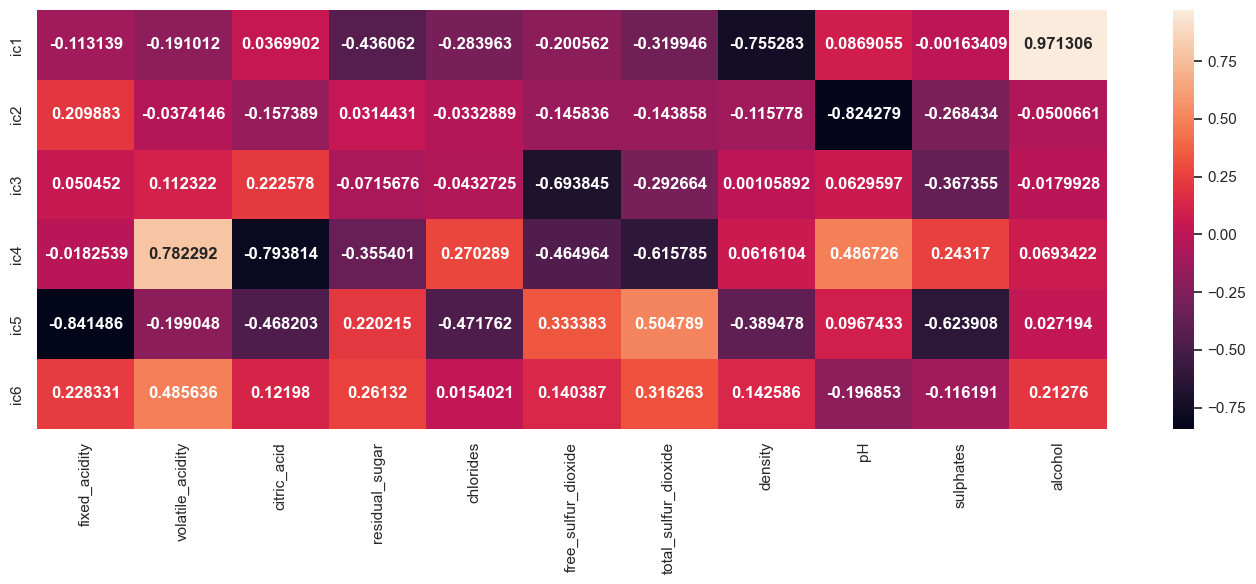

In [14]:
# Apply ICA with optimal components to data
ica = FastICA(n_components = 6, random_state=RANDOM_STATE)
wq_ica = ica.fit_transform(wq_scaled)
wq_df = pd.DataFrame(wq_ica, columns=['ic1', 'ic2', 'ic3', 'ic4', 'ic5', 'ic6'])
wq_col = pd.concat([wq_df,pd.DataFrame(wq_scaled, columns=wq_X.columns)], axis=1)
# covMatrix = pd.DataFrame.cov(wq_col)
correlation=wq_col.corr()
correlation = correlation.iloc[:6]
correlation = correlation.drop(['ic1', 'ic2', 'ic3', 'ic4', 'ic5', 'ic6'], axis=1)
sns.set(rc={'figure.figsize':(14,6)})
cm = sns.heatmap(correlation, annot=True, fmt='g', annot_kws={"fontsize":12, 'weight':'bold'})
plt.tight_layout()
plt.show()
fig = cm.get_figure()
fig.savefig(f'plots/dim_red/wq_ica_cm.png', dpi=600)

In [15]:
# # Apply ICA with optimal components to data
# ica = FastICA(n_components = 6, random_state=RANDOM_STATE)
# wq_ica = ica.fit_transform(wq_scaled)
# print(ica.mixing_)
# wq_df = pd.DataFrame(ica.mixing_, columns=['ic1', 'ic2', 'ic3', 'ic4', 'ic5', 'ic6'], index=wq_X.columns)
# sns.set(rc={'figure.figsize':(14,6)})
# cm = sns.heatmap(wq_df, annot=True, fmt='g', annot_kws={"fontsize":12, 'weight':'bold'})
# plt.tight_layout()
# plt.show()
# fig = cm.get_figure()
# fig.savefig(f'plots/dim_red/wq_ica_cm.png', dpi=1200)

### Randomized Projections

In [16]:
rp_range = np.arange(1, 12)

re = defaultdict(dict)

for i, n in product(range(11), rp_range):
    rp = GaussianRandomProjection(n_components=n, random_state=RANDOM_STATE)
    X_reduced = rp.fit_transform(wq_scaled)
    reconstructed_X = rp.inverse_transform(X_reduced)
    
    MSE = metrics.mean_squared_error(wq_scaled, reconstructed_X)
    re[n][i] = MSE
    
rec = pd.DataFrame(re).T
re_mean = rec.mean(axis=1).tolist()
re_std = rec.std(axis=1).tolist()
lower_axis = []
upper_axis = []

zip_object = zip(re_mean, re_std)
for list1_i, list2_i in zip_object:
    lower_axis.append(list1_i - list2_i)
    upper_axis.append(list1_i + list2_i)

In [17]:
print(re_mean)

[0.0732334521006575, 0.055067669928847665, 0.05263220217702409, 0.0510108318738891, 0.04914911823695216, 0.02819154258995775, 0.027505493304847285, 0.02096440198470263, 0.01783512476466414, 0.009853437988461283, 8.771331025786628e-31]


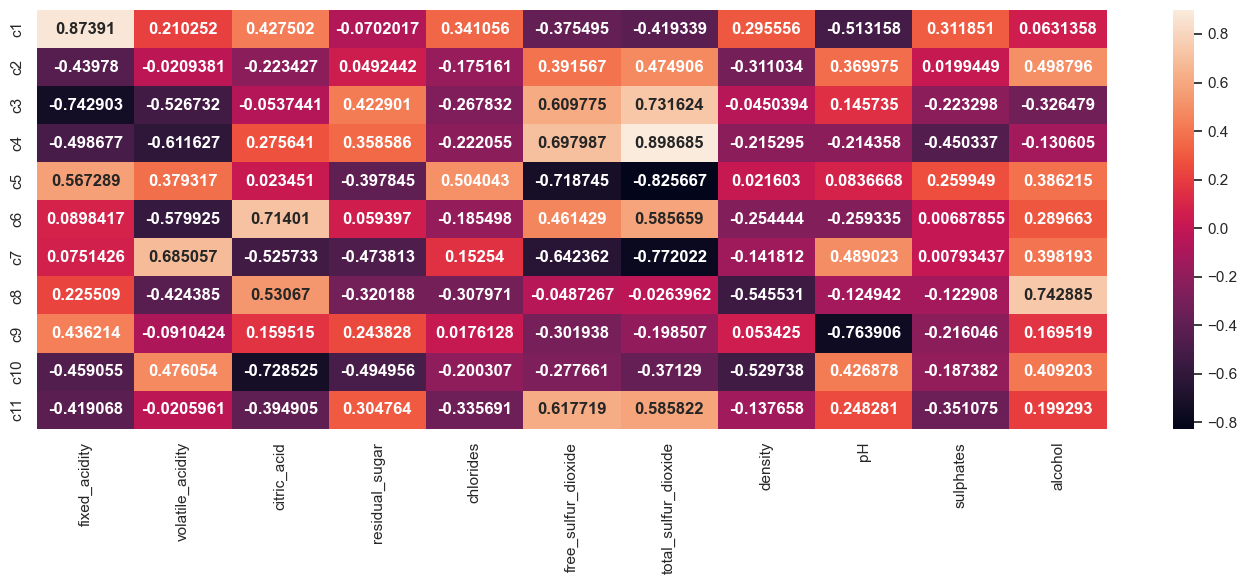

In [18]:
# Apply Randomized Projections with optimal components to data
rp = GaussianRandomProjection(n_components=11, random_state=RANDOM_STATE)
wq_rp = rp.fit_transform(wq_scaled)
wq_df = pd.DataFrame(wq_rp, columns=['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'c11'])
wq_col = pd.concat([wq_df,pd.DataFrame(wq_scaled, columns=wq_X.columns)], axis=1)
# covMatrix = pd.DataFrame.cov(wq_col)
correlation=wq_col.corr()
correlation = correlation.iloc[:11]
correlation = correlation.drop(['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'c11'], axis=1)
sns.set(rc={'figure.figsize':(14,6)})
cm = sns.heatmap(correlation, annot=True, fmt='g', annot_kws={"fontsize":12, 'weight':'bold'})
plt.tight_layout()
plt.show()
fig = cm.get_figure()
fig.savefig(f'plots/dim_red/wq_rp_cm.png', dpi=600)

### Manifold Learning: Locally Linear Embedding

In [19]:
lle_range = np.arange(1, 12)
re_list = []
for i in lle_range:
    lle = LocallyLinearEmbedding(n_neighbors=10, n_components=i, random_state=RANDOM_STATE, n_jobs=-1)
    lle.fit_transform(wq_scaled)
    re_list.append(lle.reconstruction_error_)

In [20]:
print(re_list)

[6.982309243843773e-17, 1.4455049124389011e-11, 1.445506651760167e-11, 4.7955549817675937e-11, 1.667286732005876e-10, 6.540281557017507e-10, 1.4887762805595785e-09, 3.3690992880411253e-09, 1.068410417438997e-08, 1.7256607529959197e-08, 2.5991534139661918e-08]


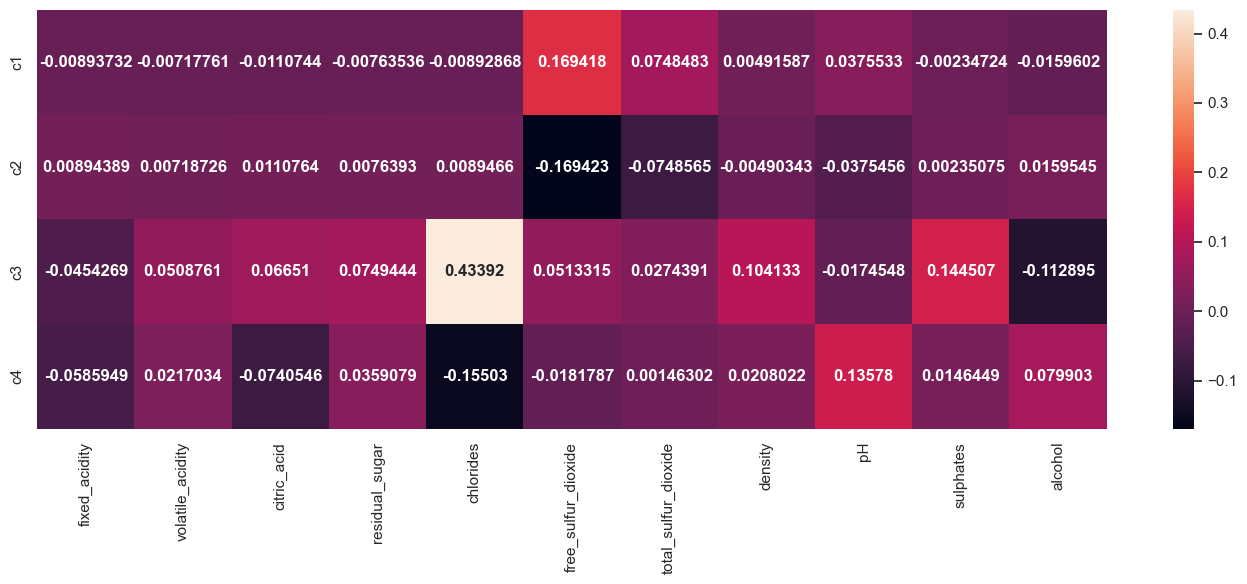

In [21]:
# Apply LLE with optimal components to data
lle = LocallyLinearEmbedding(n_neighbors=10, n_components=4, random_state=RANDOM_STATE, n_jobs=-1)
wq_lle = lle.fit_transform(wq_scaled)
wq_df = pd.DataFrame(wq_lle, columns=['c1', 'c2', 'c3', 'c4'])
wq_col = pd.concat([wq_df,pd.DataFrame(wq_scaled, columns=wq_X.columns)], axis=1)
# covMatrix = pd.DataFrame.cov(wq_col)
correlation=wq_col.corr()
correlation = correlation.iloc[:4]
correlation = correlation.drop(['c1', 'c2', 'c3', 'c4'], axis=1)
sns.set(rc={'figure.figsize':(14,6)})
cm = sns.heatmap(correlation, annot=True, fmt='g', annot_kws={"fontsize":12, 'weight':'bold'})
plt.tight_layout()
plt.show()
fig = cm.get_figure()
fig.savefig(f'plots/dim_red/wq_lle_cm.png', dpi=600)

### Cumulative Plot

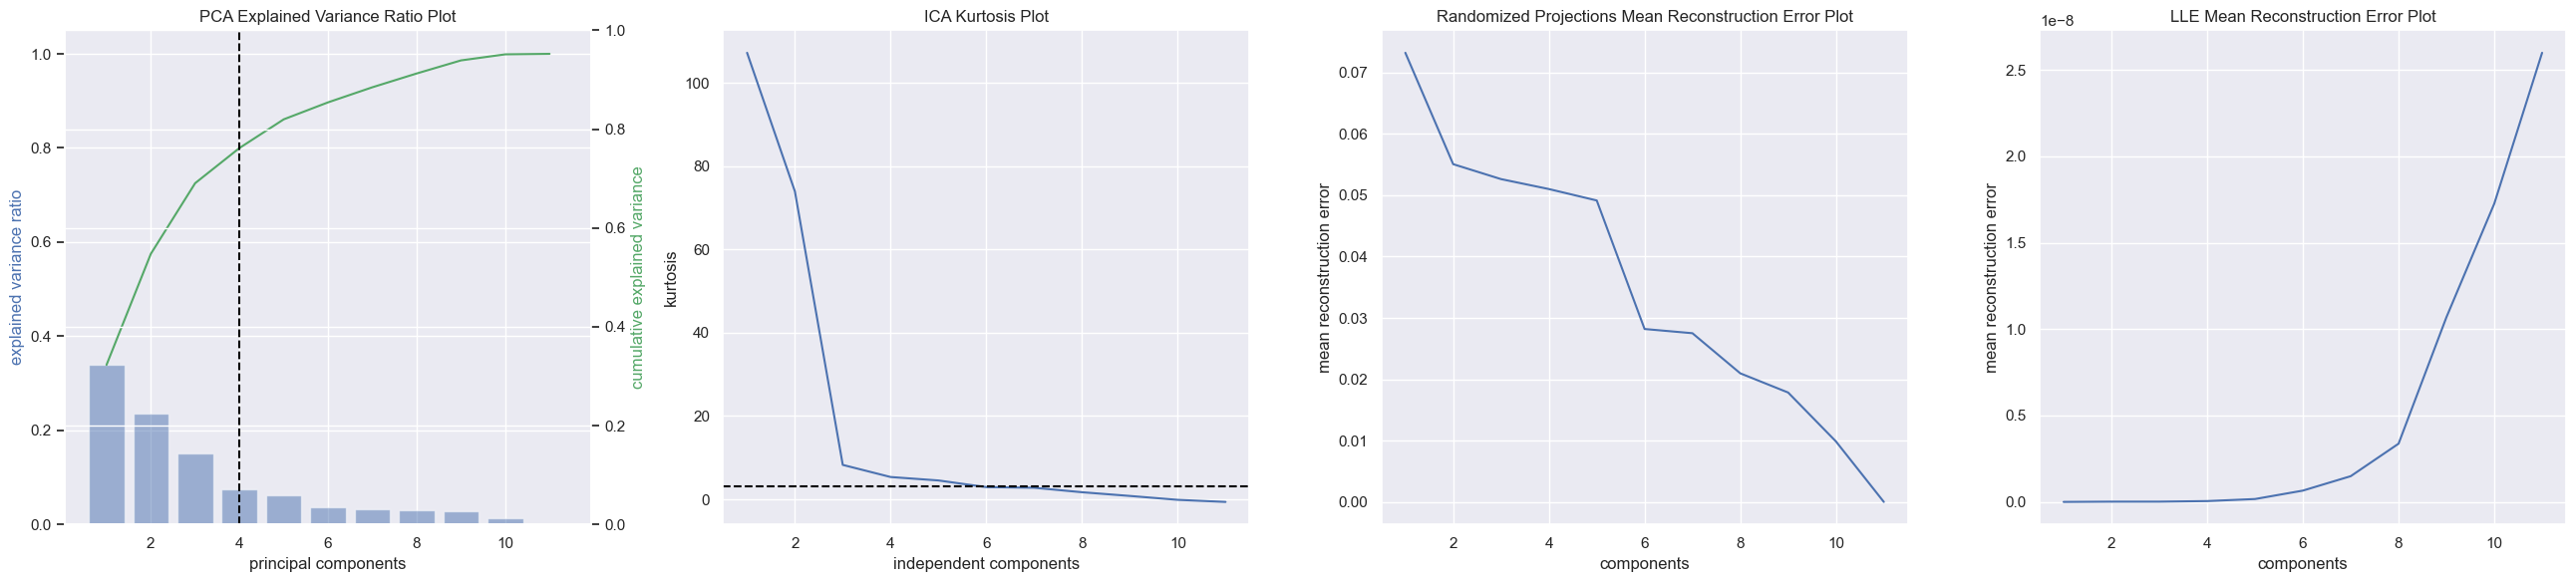

In [22]:
fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(1, 4, figsize=(26, 6))


###### PCA ######

pca_range = np.arange(1, 12)
ax1x = ax1.twinx()
ax1.bar(pca_range, ratios, color='b', alpha = .5)
ax1.plot(pca_range, cumulative_variances, color='g')
ax1.axvline(x = evr_elbow, color='black', linestyle='--')
ax1.set_title('PCA Explained Variance Ratio Plot')
ax1.set_xlabel('principal components')
ax1.set_ylabel('explained variance ratio', color = 'b')
ax1x.set_ylabel('cumulative explained variance', color = 'g')
ax1.grid(True)


###### ICA ######
ax2.plot(ica_range, kurt_scores)
ax2.set_xlabel('independent components')
ax2.set_ylabel('kurtosis')
ax2.set_title('ICA Kurtosis Plot')
ax2.axhline(y = 3, color='black', linestyle='--')
ax2.grid(True)


###### Randomized Projections #######

ax3.plot(rp_range, re_mean)
ax3.fill_between(rp_range, lower_axis, upper_axis, alpha=.2)
ax3.set_xlabel('components')
ax3.set_ylabel('mean reconstruction error')
ax3.set_title('Randomized Projections Mean Reconstruction Error Plot')
ax3.grid(True)

###### LLE ######

ax4.plot(lle_range, re_list)
ax4.set_xlabel('components')
ax4.set_ylabel('mean reconstruction error')
ax4.set_title('LLE Mean Reconstruction Error Plot')
ax4.grid(True)


fig.tight_layout()
plt.savefig(f'plots/dim_red/wq_dim_red.png', dpi=600)

## Breast Cancer

### PCA

In [23]:
# Get plotting info
pca_range = np.arange(1, 31)
explained_variances = []
ratios = []
pca = PCA(n_components = 30, random_state=RANDOM_STATE)
pca.fit(bc_scaled)
explained_variances = pca.explained_variance_
ratios = pca.explained_variance_ratio_
cumulative_variances = np.cumsum(ratios)
k = KneeLocator(pca_range, cumulative_variances, curve='concave', direction='increasing')
evr_elbow = k.knee

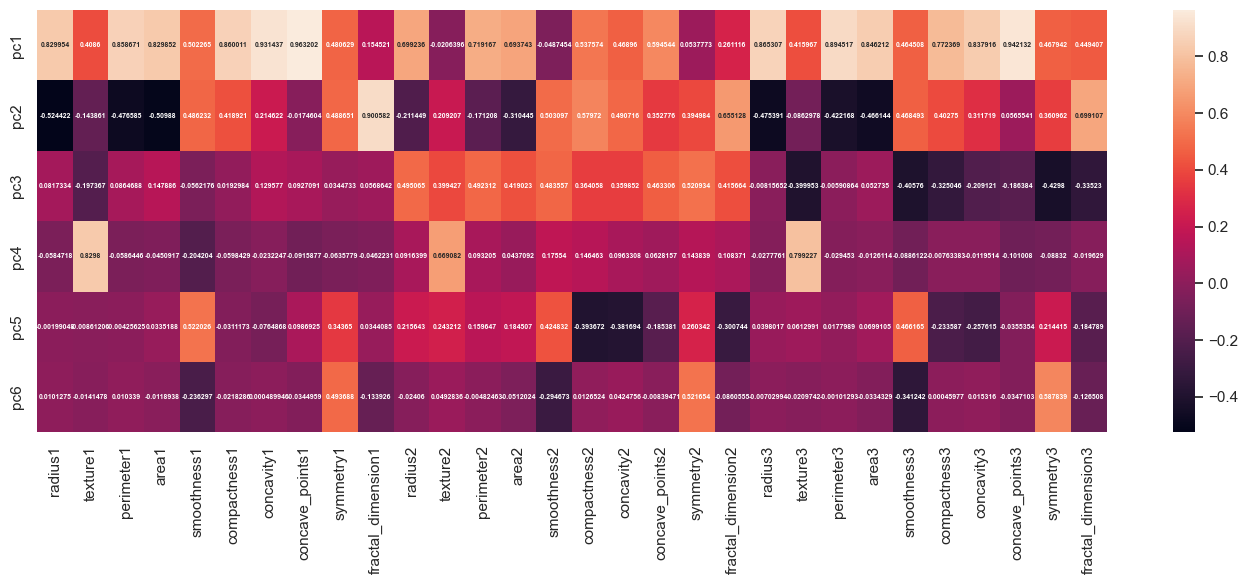

In [24]:
# Apply PCA with optimal components to data
pca = PCA(n_components = 6, random_state=RANDOM_STATE)
bc_pca = pca.fit_transform(bc_scaled)
bc_df = pd.DataFrame(bc_pca, columns=['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6'])
bc_col = pd.concat([bc_df,pd.DataFrame(bc_scaled, columns=bc_X.columns)], axis=1)
# covMatrix = pd.DataFrame.cov(wq_col)
correlation=bc_col.corr()
correlation = correlation.iloc[:6]
correlation = correlation.drop(['pc1', 'pc2', 'pc3', 'pc4', 'pc5', 'pc6'], axis=1)
sns.set(rc={'figure.figsize':(14,6)})
cm = sns.heatmap(correlation, annot=True, fmt='g', annot_kws={"fontsize":5, 'weight':'bold'})
plt.tight_layout()
plt.show()
fig = cm.get_figure()
fig.savefig(f'plots/dim_red/bc_pca_cm.png', dpi=600)

### ICA

In [25]:
# Fit ICA model
ica_range = np.arange(1, 31)
kurt_scores = []


ica = FastICA(n_components=30, random_state=RANDOM_STATE, max_iter=500)
ica = ica.fit_transform(bc_scaled)
ica = pd.DataFrame(ica)
ica = ica.kurt(axis=0)
kurt_scores = np.sort(ica.values)[::-1]
print(kurt_scores)

[264.91972315 204.96573011  80.37361117  75.31746024  53.9723557
  51.6393384   51.14698861  31.85913299  24.57522348  23.48638789
  21.7351586   15.19663041  14.76602666  10.97028271  10.7736127
   9.15391616   9.1136489    8.83278853   7.13764343   5.77581737
   5.1724101    4.97710129   4.42220127   4.32698171   4.05280343
   3.85553602   3.20869695   2.52602294   2.51947145  -0.52351433]


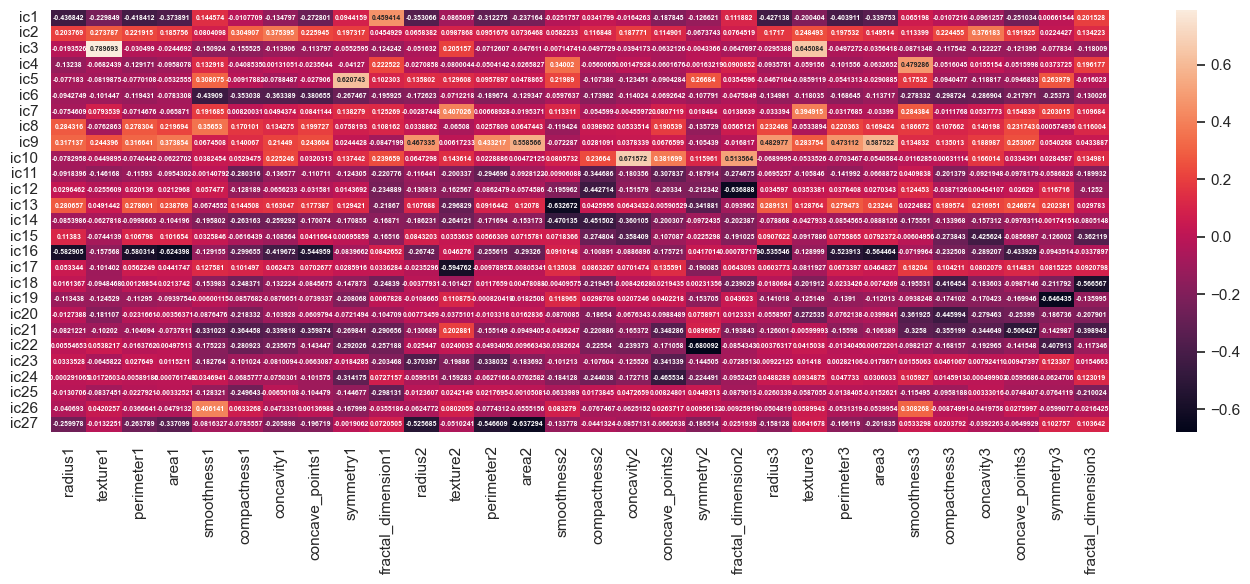

In [26]:
# Apply ICA with optimal components to data
ica = FastICA(n_components=27, random_state=RANDOM_STATE, max_iter=500)
bc_ica = ica.fit_transform(bc_scaled)
bc_df = pd.DataFrame(bc_ica, columns=['ic1', 'ic2', 'ic3', 'ic4', 'ic5', 'ic6', 'ic7', 'ic8', 'ic9', 'ic10', 'ic11', 'ic12', 'ic13', 'ic14', 'ic15', 'ic16', 'ic17', 'ic18', 'ic19', 'ic20', 'ic21', 'ic22', 'ic23', 'ic24', 'ic25', 'ic26', 'ic27'])
bc_col = pd.concat([bc_df,pd.DataFrame(bc_scaled, columns=bc_X.columns)], axis=1)
# covMatrix = pd.DataFrame.cov(wq_col)
correlation=bc_col.corr()
correlation = correlation.iloc[:27]
correlation = correlation.drop(['ic1', 'ic2', 'ic3', 'ic4', 'ic5', 'ic6', 'ic7', 'ic8', 'ic9', 'ic10', 'ic11', 'ic12', 'ic13', 'ic14', 'ic15', 'ic16', 'ic17', 'ic18', 'ic19', 'ic20', 'ic21', 'ic22', 'ic23', 'ic24', 'ic25', 'ic26', 'ic27'], axis=1)
sns.set(rc={'figure.figsize':(14,6)})
cm = sns.heatmap(correlation, annot=True, fmt='g', annot_kws={"fontsize":5, 'weight':'bold'})
plt.tight_layout()
plt.show()
fig = cm.get_figure()
fig.savefig(f'plots/dim_red/bc_ica_cm.png', dpi=600)

### Randomized Projections

In [27]:
rp_range = np.arange(1, 31)

re = defaultdict(dict)

for i, n in product(range(31), rp_range):
    rp = GaussianRandomProjection(n_components=n, random_state=RANDOM_STATE)
    X_reduced = rp.fit_transform(bc_scaled)
    reconstructed_X = rp.inverse_transform(X_reduced)
    
    MSE = metrics.mean_squared_error(bc_scaled, reconstructed_X)
    re[n][i] = MSE
    
rec = pd.DataFrame(re).T
re_mean = rec.mean(axis=1).tolist()
re_std = rec.std(axis=1).tolist()
lower_axis = []
upper_axis = []

zip_object = zip(re_mean, re_std)
for list1_i, list2_i in zip_object:
    lower_axis.append(list1_i - list2_i)
    upper_axis.append(list1_i + list2_i)

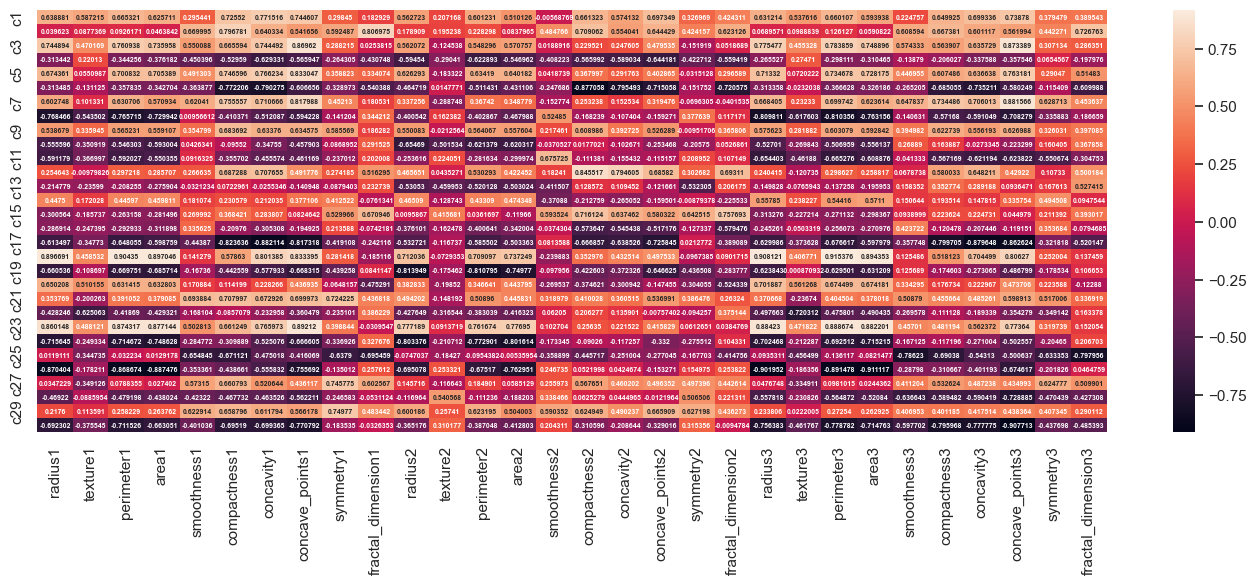

In [28]:
# Apply Randomized Projections with optimal components to data
rp = GaussianRandomProjection(n_components=30, random_state=RANDOM_STATE)
bc_rp = rp.fit_transform(bc_scaled)
bc_df = pd.DataFrame(bc_rp, columns=['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'c11', 'c12', 'c13', 'c14', 'c15', 'c16', 'c17', 'c18', 'c19', 'c20', 'c21', 'c22', 'c23', 'c24', 'c25', 'c26', 'c27', 'c28', 'c29', 'c30'])
bc_col = pd.concat([bc_df,pd.DataFrame(bc_scaled, columns=bc_X.columns)], axis=1)
# covMatrix = pd.DataFrame.cov(wq_col)
correlation=bc_col.corr()
correlation = correlation.iloc[:30]
correlation = correlation.drop(['c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'c11', 'c12', 'c13', 'c14', 'c15', 'c16', 'c17', 'c18', 'c19', 'c20', 'c21', 'c22', 'c23', 'c24', 'c25', 'c26', 'c27', 'c28', 'c29', 'c30'], axis=1)
sns.set(rc={'figure.figsize':(14,6)})
cm = sns.heatmap(correlation, annot=True, fmt='g', annot_kws={"fontsize":5, 'weight':'bold'})
plt.tight_layout()
plt.show()
fig = cm.get_figure()
fig.savefig(f'plots/dim_red/bc_rp_cm.png', dpi=600)

### Manifold Learning: Locally Linear Embedding

In [29]:
lle_range = np.arange(1, 31)
re_list = []
for i in lle_range:
    lle = LocallyLinearEmbedding(n_neighbors=10, n_components=i, random_state=RANDOM_STATE, n_jobs=-1)
    lle.fit_transform(bc_scaled)
    re_list.append(lle.reconstruction_error_)
print(re_list)

[2.264049361430442e-06, 1.2422018971229795e-05, 3.506357167011281e-05, 8.220393895430892e-05, 0.0001925865173540335, 0.00047566985641532404, 0.0007794739217891879, 0.0011410258475173679, 0.001663735582795049, 0.0022738735459423096, 0.0032169715125671084, 0.004408004257597692, 0.005721821554662955, 0.007417997431663088, 0.0093678004105425, 0.011624210152390404, 0.014422821390311482, 0.017757573690528345, 0.021138091566657715, 0.025174344555760626, 0.02939569641059412, 0.034390472391026036, 0.039600654786683426, 0.04490317027983789, 0.050671064217468434, 0.0571665837519148, 0.06436071629170521, 0.07198410251332613, 0.08007286992974459, 0.08966920409896745]


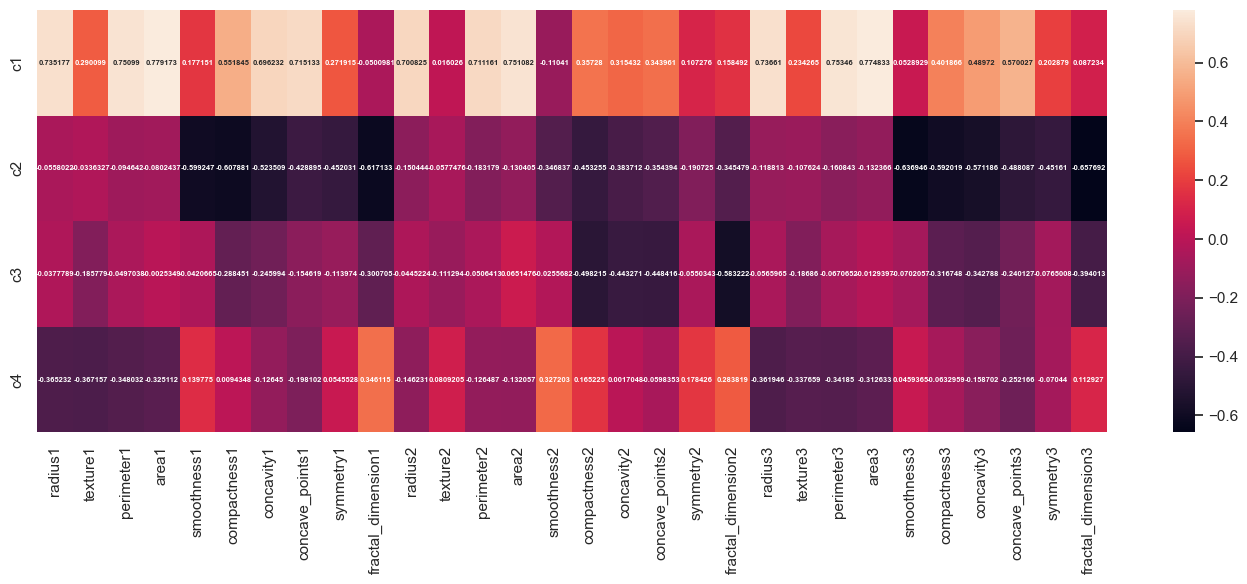

In [30]:
# Apply LLE with optimal components to data
lle = LocallyLinearEmbedding(n_neighbors=10, n_components=4, random_state=RANDOM_STATE, n_jobs=-1)
bc_lle = lle.fit_transform(bc_scaled)
bc_df = pd.DataFrame(bc_lle, columns=['c1', 'c2', 'c3', 'c4'])
bc_col = pd.concat([bc_df,pd.DataFrame(bc_scaled, columns=bc_X.columns)], axis=1)
# covMatrix = pd.DataFrame.cov(wq_col)
correlation=bc_col.corr()
correlation = correlation.iloc[:4]
correlation = correlation.drop(['c1', 'c2', 'c3', 'c4'], axis=1)
sns.set(rc={'figure.figsize':(14,6)})
cm = sns.heatmap(correlation, annot=True, fmt='g', annot_kws={"fontsize":5.5, 'weight':'bold'})
plt.tight_layout()
plt.show()
fig = cm.get_figure()
fig.savefig(f'plots/dim_red/bc_lle_cm.png', dpi=600)

### Cumulative Plot

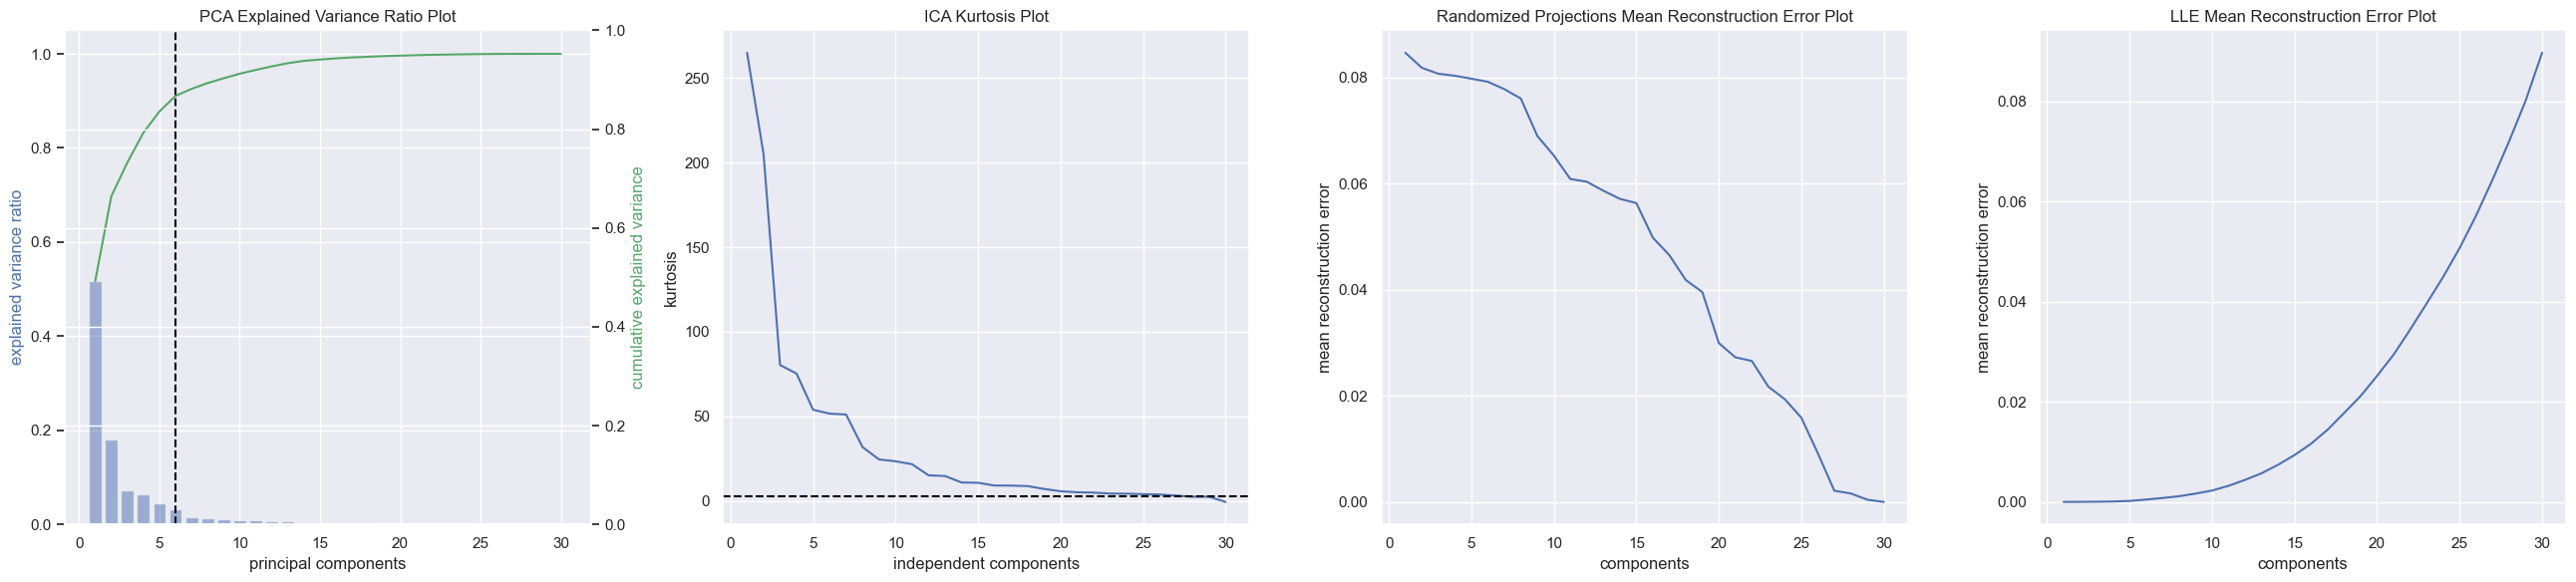

In [31]:
fig, ((ax1, ax2, ax3, ax4)) = plt.subplots(1, 4, figsize=(26, 6))


###### PCA ######

pca_range = np.arange(1, 31)
ax1x = ax1.twinx()
ax1.bar(pca_range, ratios, color='b', alpha = .5)
ax1.plot(pca_range, cumulative_variances, color='g')
ax1.axvline(x = evr_elbow, color='black', linestyle='--')
ax1.set_title('PCA Explained Variance Ratio Plot')
ax1.set_xlabel('principal components')
ax1.set_ylabel('explained variance ratio', color = 'b')
ax1x.set_ylabel('cumulative explained variance', color = 'g')
ax1.grid(True)


###### ICA ######
ax2.plot(ica_range, kurt_scores)
ax2.set_xlabel('independent components')
ax2.set_ylabel('kurtosis')
ax2.set_title('ICA Kurtosis Plot')
ax2.axhline(y = 3, color='black', linestyle='--')
ax2.grid(True)


###### Randomized Projections #######

ax3.plot(rp_range, re_mean)
ax3.fill_between(rp_range, lower_axis, upper_axis, alpha=.2)
ax3.set_xlabel('components')
ax3.set_ylabel('mean reconstruction error')
ax3.set_title('Randomized Projections Mean Reconstruction Error Plot')
ax3.grid(True)

###### LLE ######

ax4.plot(lle_range, re_list)
ax4.set_xlabel('components')
ax4.set_ylabel('mean reconstruction error')
ax4.set_title('LLE Mean Reconstruction Error Plot')
ax4.grid(True)


fig.tight_layout()
plt.savefig(f'plots/dim_red/bc_dim_red.png', dpi=600)

[14965.803932755312, 15222.0754724592, 15248.252099177736, 15249.95411046957, 15251.121699486923, 15251.214985403187, 15251.271398698324, 15251.281148193524, 15251.285182329751, 15251.287000551827, 15251.286402313035, 15251.286400806815, 15251.286287585212, 15251.28596672165, 15251.28595175497, 15251.285795212601, 15251.285714250944, 15251.285644899628, 15251.285586811378, 15251.285550709832, 15251.285527499105, 15251.28550434416, 15251.28548318189, 15251.28547253914, 15251.285465312823, 15251.285454630613, 15251.285450643916, 15251.285447436921, 15251.28544262442, 15251.28544096514]


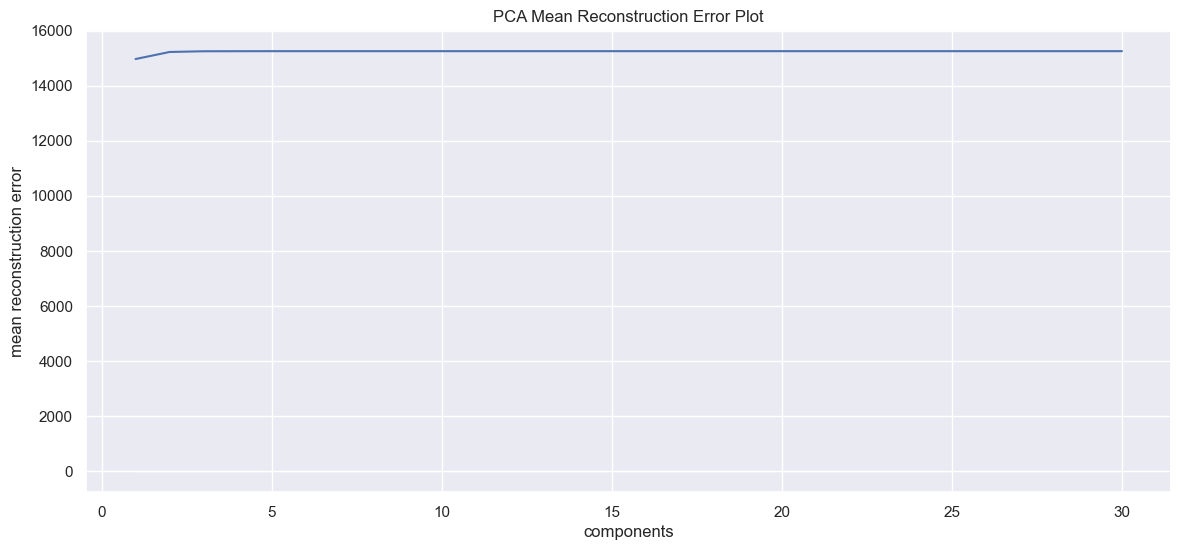

In [32]:
rp_range = np.arange(1, 31)

re = defaultdict(dict)

for i, n in product(range(31), rp_range):
    pca = PCA(n_components = n, random_state=RANDOM_STATE)
    X_reduced = pca.fit_transform(bc_X)
    p_inverse = np.linalg.pinv(pca.components_.T)
    p_norm = np.linalg.norm(pca.components_.T, 'fro')
#     print(p_inverse)
#     print("norm: ", pca.components_.T)
    reconstructed_X = X_reduced.dot(pca.components_)
    
    MSE = metrics.mean_squared_error(bc_scaled, reconstructed_X)
    re[n][i] = MSE


rec = pd.DataFrame(re).T
pca_re_mean = rec.mean(axis=1).tolist()
re_std = rec.std(axis=1).tolist()
lower_axis = []
upper_axis = []
print(pca_re_mean)

zip_object = zip(re_mean, re_std)
for list1_i, list2_i in zip_object:
    lower_axis.append(list1_i - list2_i)
    upper_axis.append(list1_i + list2_i)

plt.plot(pca_range, pca_re_mean)
plt.fill_between(pca_range, lower_axis, upper_axis, alpha=.2)
plt.xlabel('components')
plt.ylabel('mean reconstruction error')
plt.title('PCA Mean Reconstruction Error Plot')
plt.grid(True)